<a href="https://colab.research.google.com/github/LeeGitaek/2020_AI_Class/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [0]:
 import torch
 import torch.optim as optim

In [0]:
torch.manual_seed(1)

In [0]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

print(x_train)
print(x_train.shape)

print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [0]:
w = torch.zeros(1,requires_grad=True)
print(w)

tensor([0.], requires_grad=True)


In [0]:
b = torch.zeros(1,requires_grad=True)
print(b)


tensor([0.], requires_grad=True)


Hypothesis


In [0]:
hypothesis = x_train*w+b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


Cost


In [0]:
cost = torch.mean((hypothesis-y_train) **2)
print(cost)


tensor(4.6667, grad_fn=<MeanBackward0>)


Gradient Descent


In [0]:

optimizer = optim.SGD([w,b],lr=0.01)

#옵티마이저 초기화
optimizer.zero_grad()
# cost 계산 
cost.backward()
# 옵티마이저 갱신 
optimizer.step()

In [0]:
print(w)
print(b)


tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


In [0]:
hypothesis = x_train*w+b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [0]:
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


In [0]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

w = torch.zeros(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)

optimizer = optim.SGD([w,b],lr=0.01)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    hypothesis = x_train*w+b

    cost = torch.mean((hypothesis-y_train) **2)
    #옵티마이저 초기화
    optimizer.zero_grad()
    # cost 계산 
    cost.backward()
    # 옵티마이저 갱신 
    optimizer.step()

    if epoch % 100 == 0:
      print('epoch {:4d}/{} w:{:.3f} b:{:.3f} cost:{:.6f}'.format(
          epoch,nb_epochs,w.item(),b.item(),cost.item()
      ))


print(w*7+b)

epoch    0/1000 w:0.093 b:0.040 cost:4.666667
epoch  100/1000 w:0.873 b:0.289 cost:0.012043
epoch  200/1000 w:0.900 b:0.227 cost:0.007442
epoch  300/1000 w:0.921 b:0.179 cost:0.004598
epoch  400/1000 w:0.938 b:0.140 cost:0.002842
epoch  500/1000 w:0.951 b:0.110 cost:0.001756
epoch  600/1000 w:0.962 b:0.087 cost:0.001085
epoch  700/1000 w:0.970 b:0.068 cost:0.000670
epoch  800/1000 w:0.976 b:0.054 cost:0.000414
epoch  900/1000 w:0.981 b:0.042 cost:0.000256
epoch 1000/1000 w:0.985 b:0.033 cost:0.000158
tensor([6.9311], grad_fn=<AddBackward0>)


Minimizing_Cost


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [0]:
torch.manual_seed(1)

In [0]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

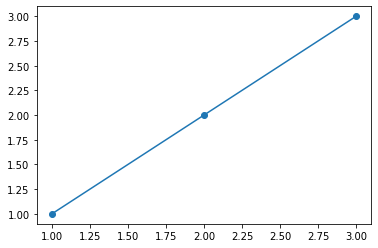

In [0]:
plt.scatter(x_train,y_train)
#best fit line dvd by 1000 
xs = np.linspace(1,3,1000)
plt.plot(xs,xs)

In [0]:
print(xs)

[1.         1.002002   1.004004   1.00600601 1.00800801 1.01001001
 1.01201201 1.01401401 1.01601602 1.01801802 1.02002002 1.02202202
 1.02402402 1.02602603 1.02802803 1.03003003 1.03203203 1.03403403
 1.03603604 1.03803804 1.04004004 1.04204204 1.04404404 1.04604605
 1.04804805 1.05005005 1.05205205 1.05405405 1.05605606 1.05805806
 1.06006006 1.06206206 1.06406406 1.06606607 1.06806807 1.07007007
 1.07207207 1.07407407 1.07607608 1.07807808 1.08008008 1.08208208
 1.08408408 1.08608609 1.08808809 1.09009009 1.09209209 1.09409409
 1.0960961  1.0980981  1.1001001  1.1021021  1.1041041  1.10610611
 1.10810811 1.11011011 1.11211211 1.11411411 1.11611612 1.11811812
 1.12012012 1.12212212 1.12412412 1.12612613 1.12812813 1.13013013
 1.13213213 1.13413413 1.13613614 1.13813814 1.14014014 1.14214214
 1.14414414 1.14614615 1.14814815 1.15015015 1.15215215 1.15415415
 1.15615616 1.15815816 1.16016016 1.16216216 1.16416416 1.16616617
 1.16816817 1.17017017 1.17217217 1.17417417 1.17617618 1.1781

cost by w

In [0]:
#list <= 순차적으로 데이터를 담는 추상자료형 
w_l = np.linspace(-5,7,1000)
cost_l = []

for w in w_l:
    hypothesis = w*x_train
    cost = torch.mean((hypothesis-y_train)**2)
    cost_l.append(cost.item())
    

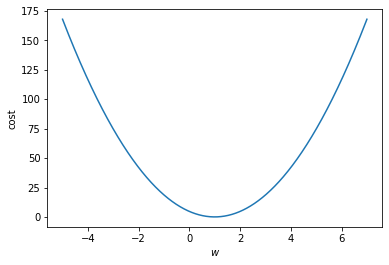

In [0]:
plt.plot(w_l,cost_l)
plt.xlabel('$w$')
plt.ylabel('cost')
plt.show()

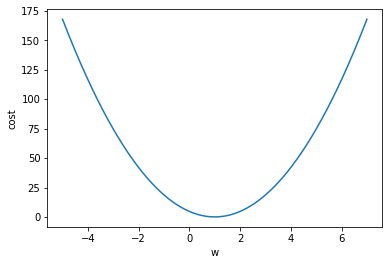

In [0]:
plt.plot(w_l,cost_l)
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

In [0]:
w = 0

In [0]:
gradient = torch.sum((w*x_train-y_train)*x_train)
print(gradient)


tensor(-14.)


In [0]:
lr = 0.1
w -=lr*gradient
print(w)

tensor(1.4000)


In [0]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

w = torch.zeros(1)

lr = 0.1

nb_epochs = 100
for epoch in range(nb_epochs+1):
    # H(x) 계산 
    hypothesis = x_train*w

    cost = torch.mean((hypothesis-y_train)**2)
    gradient = torch.sum((w*x_train-y_train)*x_train)

    print('epoch {:4d}/{} w:{:.3f} , cost : {:.6f}'.format(
        epoch,nb_epochs,w.item(),cost.item()
    ))

    w-=lr*gradient

print(w*5+b)

epoch    0/100 w:0.000 , cost : 4.666667
epoch    1/100 w:1.400 , cost : 0.746666
epoch    2/100 w:0.840 , cost : 0.119467
epoch    3/100 w:1.064 , cost : 0.019115
epoch    4/100 w:0.974 , cost : 0.003058
epoch    5/100 w:1.010 , cost : 0.000489
epoch    6/100 w:0.996 , cost : 0.000078
epoch    7/100 w:1.002 , cost : 0.000013
epoch    8/100 w:0.999 , cost : 0.000002
epoch    9/100 w:1.000 , cost : 0.000000
epoch   10/100 w:1.000 , cost : 0.000000
epoch   11/100 w:1.000 , cost : 0.000000
epoch   12/100 w:1.000 , cost : 0.000000
epoch   13/100 w:1.000 , cost : 0.000000
epoch   14/100 w:1.000 , cost : 0.000000
epoch   15/100 w:1.000 , cost : 0.000000
epoch   16/100 w:1.000 , cost : 0.000000
epoch   17/100 w:1.000 , cost : 0.000000
epoch   18/100 w:1.000 , cost : 0.000000
epoch   19/100 w:1.000 , cost : 0.000000
epoch   20/100 w:1.000 , cost : 0.000000
epoch   21/100 w:1.000 , cost : 0.000000
epoch   22/100 w:1.000 , cost : 0.000000
epoch   23/100 w:1.000 , cost : 0.000000
epoch   24/100 w

Multivariate Linear Regression

In [0]:
import torch
import torch.optim as optim

In [0]:
torch.manual_seed(1)

new data


In [0]:
x1_train = torch.FloatTensor([[73],[93],[89],[96],[73]])
x2_train = torch.FloatTensor([[80],[88],[91],[98],[66]])
x3_train = torch.FloatTensor([[75],[93],[90],[100],[70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])


In [0]:
w1 = torch.zeros(1,requires_grad=True)
w2 = torch.zeros(1,requires_grad=True)
w3 = torch.zeros(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)

optimizer = optim.SGD([w1,w2,w3,b], lr = 1e-5)
nb_epochs = 10000

for epoch in range(nb_epochs+1):
    hypothesis = x1_train*w1+x2_train*w2+x3_train*w3+b
    cost = torch.mean((hypothesis-y_train)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('epoch {:4d}/{} w1:{:.3f} w2:{:.3f} w3:{:.3f} b:{:.3f} cost:{:.6f}'.format(
          epoch,nb_epochs,w1.item(),w2.item(),w3.item(),b.item(),cost.item()
      ))

print(w*95+b)

epoch    0/10000 w1:0.294 w2:0.294 w3:0.297 b:0.003 cost:29661.800781
epoch  100/10000 w1:0.674 w2:0.661 w3:0.676 b:0.008 cost:1.563628
epoch  200/10000 w1:0.679 w2:0.655 w3:0.677 b:0.008 cost:1.497595
epoch  300/10000 w1:0.684 w2:0.649 w3:0.677 b:0.008 cost:1.435044
epoch  400/10000 w1:0.689 w2:0.643 w3:0.678 b:0.008 cost:1.375726
epoch  500/10000 w1:0.694 w2:0.638 w3:0.678 b:0.009 cost:1.319497
epoch  600/10000 w1:0.699 w2:0.633 w3:0.679 b:0.009 cost:1.266215
epoch  700/10000 w1:0.704 w2:0.627 w3:0.679 b:0.009 cost:1.215703
epoch  800/10000 w1:0.709 w2:0.622 w3:0.679 b:0.009 cost:1.167810
epoch  900/10000 w1:0.713 w2:0.617 w3:0.680 b:0.009 cost:1.122429
epoch 1000/10000 w1:0.718 w2:0.613 w3:0.680 b:0.009 cost:1.079390
epoch 1100/10000 w1:0.722 w2:0.608 w3:0.680 b:0.009 cost:1.038574
epoch 1200/10000 w1:0.727 w2:0.603 w3:0.681 b:0.010 cost:0.999900
epoch 1300/10000 w1:0.731 w2:0.599 w3:0.681 b:0.010 cost:0.963217
epoch 1400/10000 w1:0.735 w2:0.595 w3:0.681 b:0.010 cost:0.928421
epoch 

result
